In [2]:
print('hi')

hi


# This project is to predict the age of abalone snails

### Notebook imports

In [3]:
import pandas as pd
import numpy as np

# Data viz
import seaborn as sns
import matplotlib.pyplot as plt

# ML libraries

# To create training and testing data
from sklearn.model_selection import train_test_split
# To normalize data
from sklearn.preprocessing import MinMaxScaler
# Machine Learning algo that will help me predict age
from sklearn.linear_model import LinearRegression
# Feature engineering: Pre-processing to encode 'Sex' parameter in data frame
from sklearn.preprocessing import LabelEncoder
# This is the second model I will use
from sklearn.ensemble import RandomForestRegressor

# 1. To test accuracy of the model using RMSE (I will take the square root)
from sklearn.metrics import mean_squared_error
# 2. To test accuracy of the model using R-squared
from sklearn.metrics import r2_score
# 3. To test accuracy of the model using mean_absolute error
from sklearn.metrics import mean_absolute_error

### Getting the data

In [4]:
data = pd.read_csv('abalone.csv')

### Exploratory data analysis

In [5]:
data.shape

(4177, 9)

In [6]:
# CONSTANTS
NR_ROWS = data.shape[0]
NR_COLS = data.shape[1]
print('NR_ROWS', NR_ROWS)
print('NR_COLS', NR_COLS)

NR_ROWS 4177
NR_COLS 9


In [7]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
data.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [9]:
data.values

array([['M', 0.455, 0.365, ..., 0.101, 0.15, 15],
       ['M', 0.35, 0.265, ..., 0.0485, 0.07, 7],
       ['F', 0.53, 0.42, ..., 0.1415, 0.21, 9],
       ...,
       ['M', 0.6, 0.475, ..., 0.2875, 0.308, 9],
       ['F', 0.625, 0.485, ..., 0.261, 0.296, 10],
       ['M', 0.71, 0.555, ..., 0.3765, 0.495, 12]], dtype=object)

In [10]:
# Defining the target (age)
# According to online resources, the age of abalone is the number of rings + 1.5
data['age'] = data['Rings'] + 1.5

# Dropping Rings column because it is highly correlated with age
data = data.drop('Rings', axis=1)

In [11]:
# Now the data frame has an age parameter
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [12]:
# Checking the data if there are missing values
print(data.isnull().any())

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
age               False
dtype: bool


In [13]:
# Feature engineering: Encoding the Sex of the snails because there are three (infant, female, male)
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])

In [14]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


### Statistical data visualization

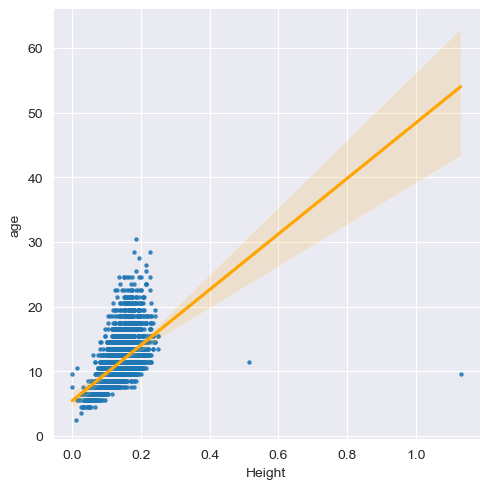

In [15]:
# Exploring the relationship between some variables with the target (age)
sns.lmplot(data=data, x='Height', y='age', scatter_kws={'s':5}, line_kws={'color':'orange'})

plt.show()

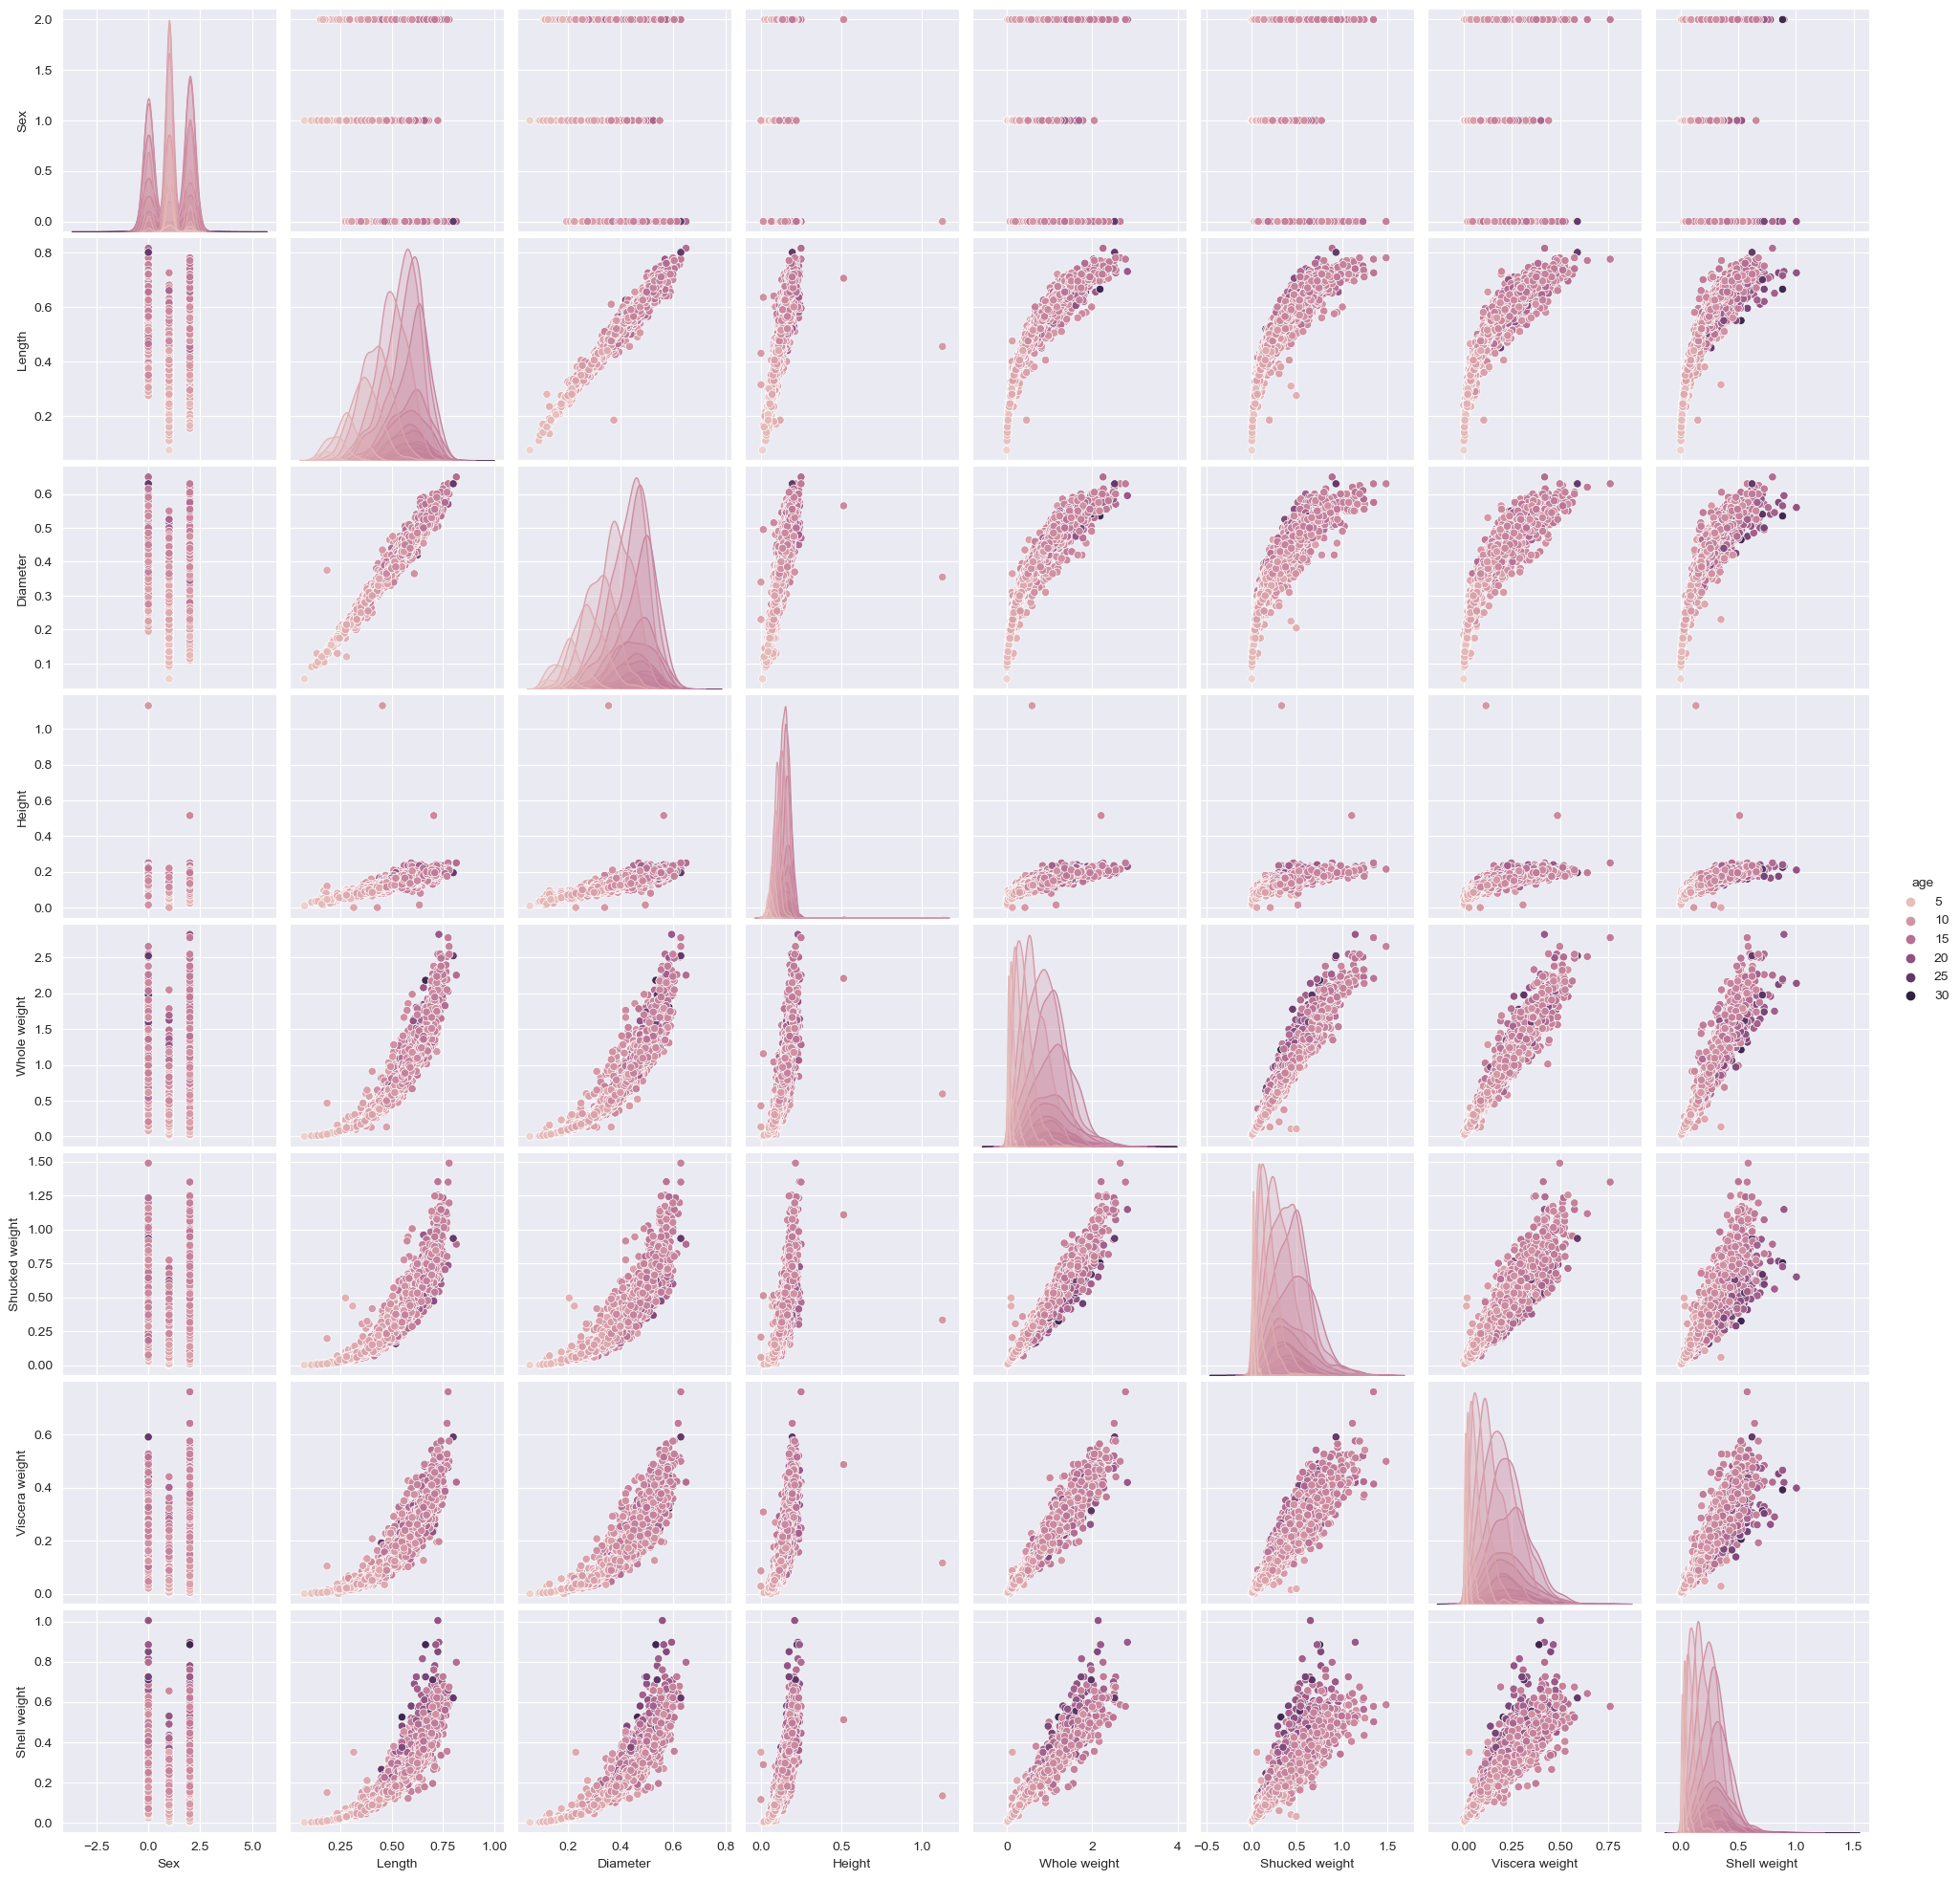

CPU times: total: 40.3 s
Wall time: 47.3 s


In [16]:
%%time
# Graphing every pairwise combination
sns.pairplot(data=data, hue='age')
plt.show()

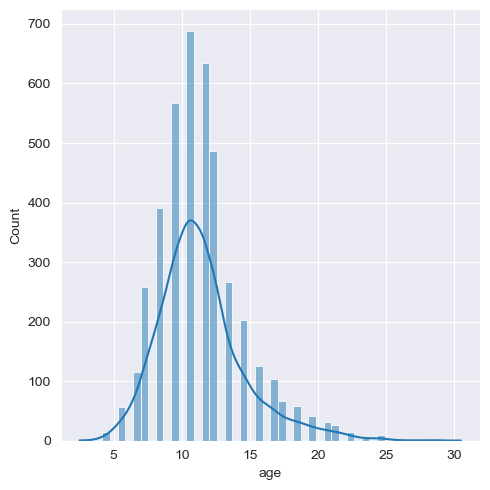

In [17]:
# Visualizing how many snails per age
sns.displot(data['age'], bins=50, kde=True)
plt.show()

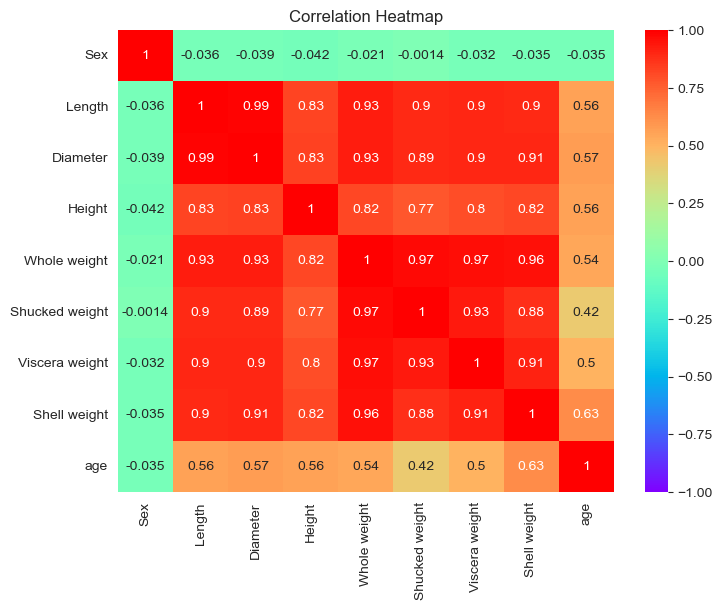

In [18]:
# Now using heatmaps to visualize correlations

# Calc corr
correlation_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(8, 6))  # Set the figure size
# Correlation matrix, annotating with numbers, cmap, correlation range
sns.heatmap(correlation_matrix, annot=True, cmap='rainbow', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

### Creating a Machine Learning model

In [19]:
# Feature Scaling

scaler = MinMaxScaler()

numeric_columns = data.select_dtypes(include=[np.number]).columns
data = data.dropna(subset=numeric_columns)
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [20]:
# First, I will split the data into training and testing
X = data.loc[:, data.columns != 'age']
y = data[['age']]
# I am from the Berkeley Class of 2027 so I'm using 2027 as the random_state :D
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2027)

#### First model using linear regression

In [21]:
# Creating the machine learning model using linear regression
model_one = LinearRegression()
model_one.fit(X_train, y_train)

LinearRegression()

In [22]:
# Making a prediction with the model
prediction_one = model_one.predict(X_test)

### Evaluating Accuracy of the Model
I will evaluate the accuracy of the model using:
1. Root mean squared
2. R^2 value
3. Mean Absolute Error

1. Root Mean Squared Equation - How much on average does the predicted values differ from actual values. This calculation is influenced by outliers:
$$ RMSE = \sqrt {MSE} = \sqrt { \frac {\sum_{i=1}^{n} (y - \hat y)^2}{n} }$$

In [23]:
from math import sqrt
RMSE_model_one = sqrt(mean_squared_error(y_true=y_test, y_pred=prediction_one))

2. R-sqared value - Measures variance in age of snails depending on the characteristics of the snails (the categories of the data frame besides age)

In [24]:
rsquared_model_one = r2_score(y_true=y_test, y_pred=prediction_one)

3. Mean Absolute Error - Absolute difference between the correct value and predicted value. If there is a error or an outlier, the overall calculation is not impacted as much as RMSE
$$ \frac{ \sum_{i=1}^{n} |y - \hat y| }{n} $$

In [25]:
MAE_model_one = mean_absolute_error(y_true=y_test, y_pred=prediction_one)

In [26]:
# Printing all the values
print('The root mean squared is:', RMSE_model_one)
print('The r-squared is:', rsquared_model_one)
print('The mean absolute error is:', MAE_model_one)

The root mean squared is: 0.07945838738476282
The r-squared is: 0.5182099130423188
The mean absolute error is: 0.05672268542923233


In [27]:
print('The root mean squared and mean absolute error having a low value indicates a good ML model')
print('The r-squared is near 50%, meaning that the model only explains 50% of the data well')

The root mean squared and mean absolute error having a low value indicates a good ML model
The r-squared is near 50%, meaning that the model only explains 50% of the data well


### Visualizing Results

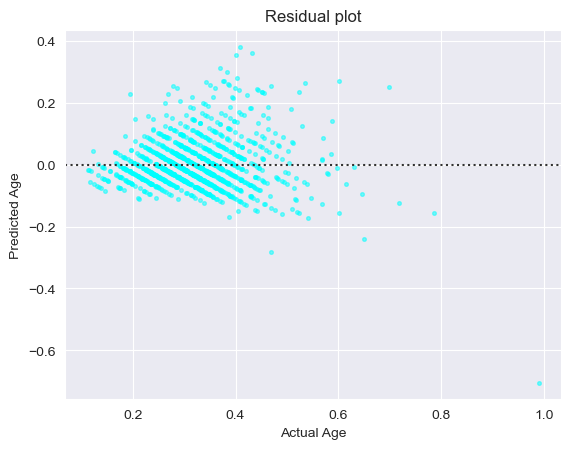

In [28]:
# Basic Residuals Plot
sns.residplot(x=prediction_one, y=y_test, scatter_kws={'color':'cyan', 's':7, 'alpha':0.5})
plt.title('Residual plot')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.show()

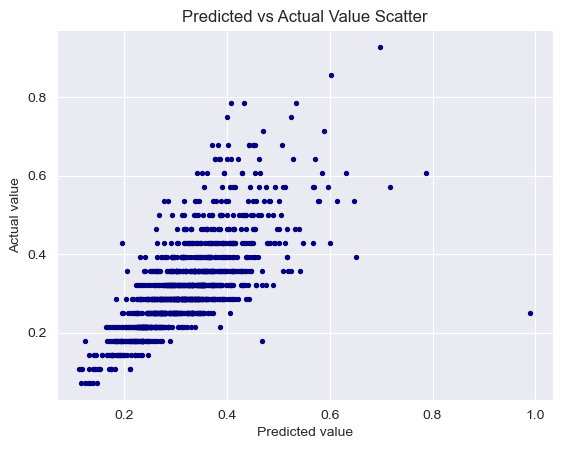

In [46]:
# Scatter plot
plt.scatter(prediction_one, y_test, s=8, color='navy')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.title('Predicted vs Actual Value Scatter')
plt.show()

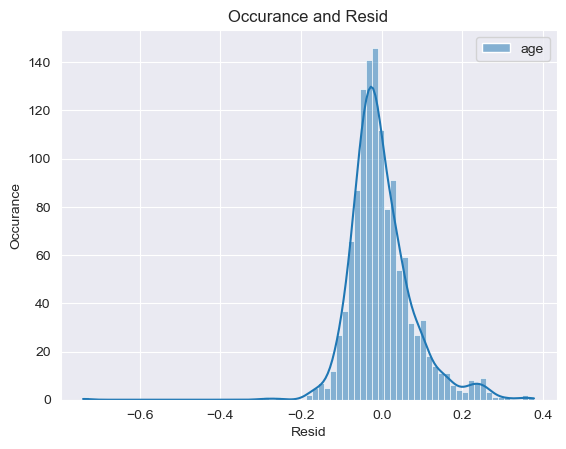

In [30]:
# Histogram with residuals
residuals_one = y_test - prediction_one
sns.histplot(residuals_one, kde=True)
plt.xlabel('Resid')
plt.ylabel('Occurance')
plt.title('Occurance and Resid')
plt.show()

### Creating a newer improved model

In [31]:
model_two = RandomForestRegressor(n_estimators=100, random_state=2027,  max_depth=8)
model_two.fit(X_train, y_train)
prediction_two = model_two.predict(X_test)

C:\Users\ohm_r\AppData\Local\Temp\ipykernel_20732\3372364253.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_two.fit(X_train, y_train)


### Evaluating newer model

In [32]:
RMSE_model_two = sqrt(mean_squared_error(y_true=y_test, y_pred=prediction_two))
rsquared_model_two = r2_score(y_true=y_test, y_pred=prediction_two)
MAE_model_two = mean_absolute_error(y_true=y_test, y_pred=prediction_two)

# Printing all the values including model one's to compare

print('Model one RMSE:', RMSE_model_one)
print('Model two RMSE:', RMSE_model_two)


print('\nModel one r-squared:', rsquared_model_one)
print('Model two r-squared:', rsquared_model_two)

print('\nModel one MAE:', MAE_model_one)
print('Model two MAE:', MAE_model_two)


Model one RMSE: 0.07945838738476282
Model two RMSE: 0.07578274325158477

Model one r-squared: 0.5182099130423188
Model two r-squared: 0.5617529404581153

Model one MAE: 0.05672268542923233
Model two MAE: 0.05351304166672562


### Visualizing Results and Comparing

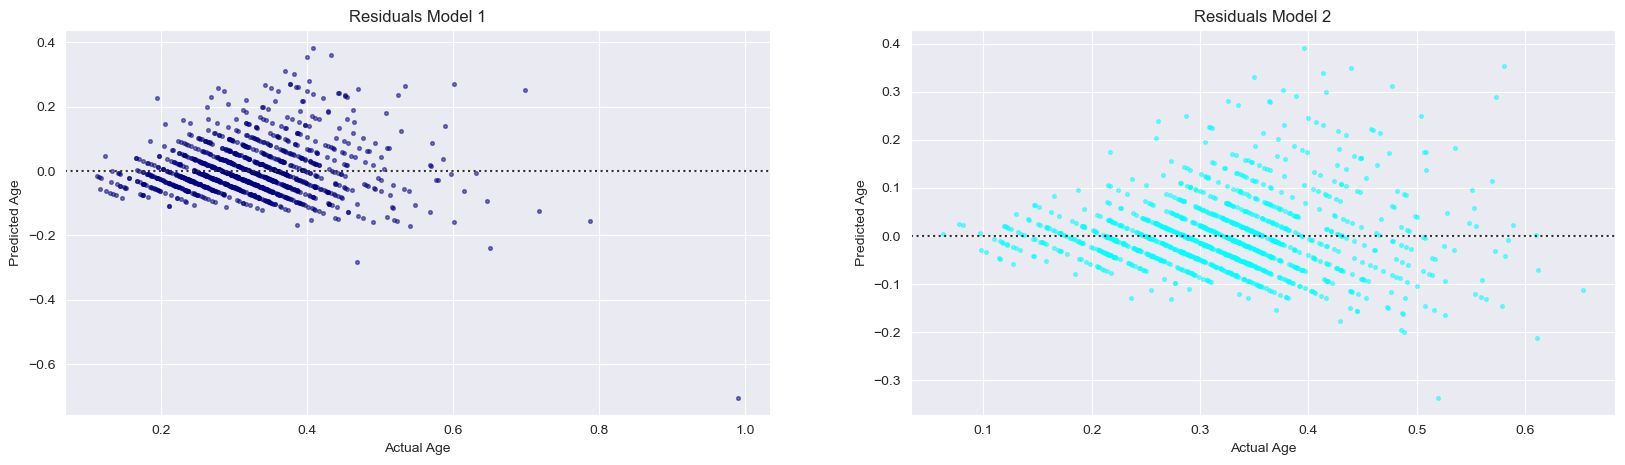

In [78]:
# Model two has more randomly scattered dots, meaning it is better than model 1
plt.figure(figsize=[20, 5])

plt.subplot(1, 2, 1)
# Resid plot 1
sns.residplot(x=prediction_one, y=y_test, scatter_kws={'color':'navy', 's':7, 'alpha':0.5})
plt.title('Residuals Model 1')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')

plt.subplot(1, 2, 2)
# Resid plot 2
sns.residplot(x=prediction_two, y=y_test, scatter_kws={'color':'cyan', 's':7, 'alpha':0.5})
plt.title('Residuals Model 2')
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')

plt.show()

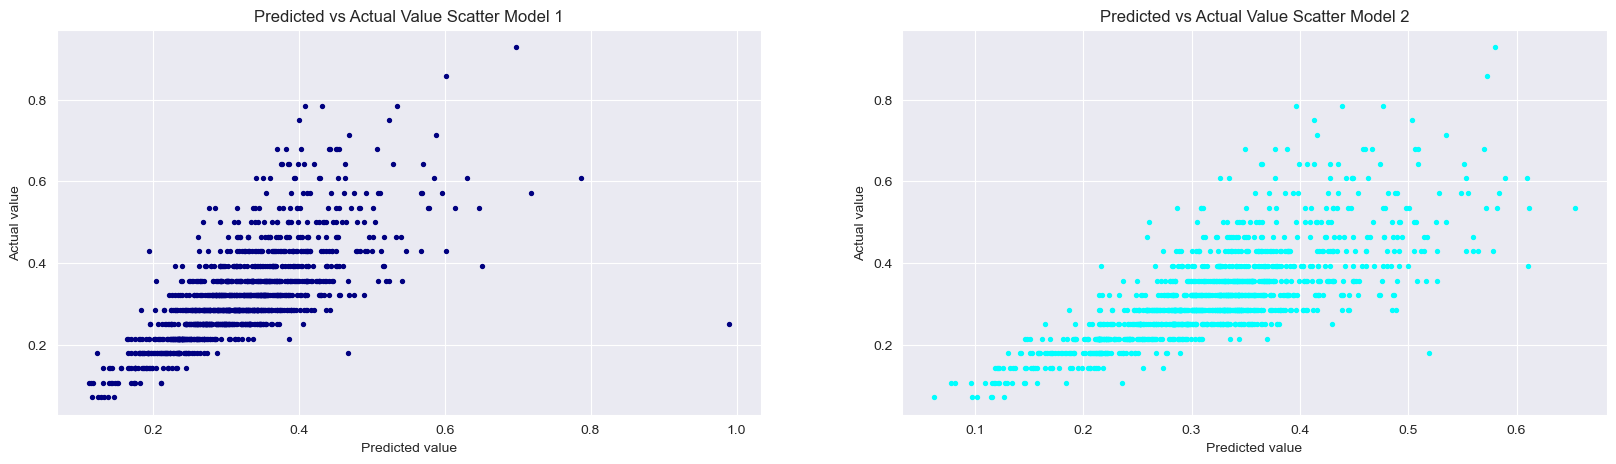

In [77]:
# The linear relationship seems more reliable in model two compared to model one
plt.figure(figsize=[20, 5])

plt.subplot(1, 2, 1)
# Scatter plot 1
plt.scatter(prediction_one, y_test, s=8, color='navy')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.title('Predicted vs Actual Value Scatter Model 1')

plt.subplot(1, 2, 2)
# Scatter plot 2
plt.scatter(prediction_two, y_test, s=8, color='cyan')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.title('Predicted vs Actual Value Scatter Model 2')

# Show all plots
plt.show()

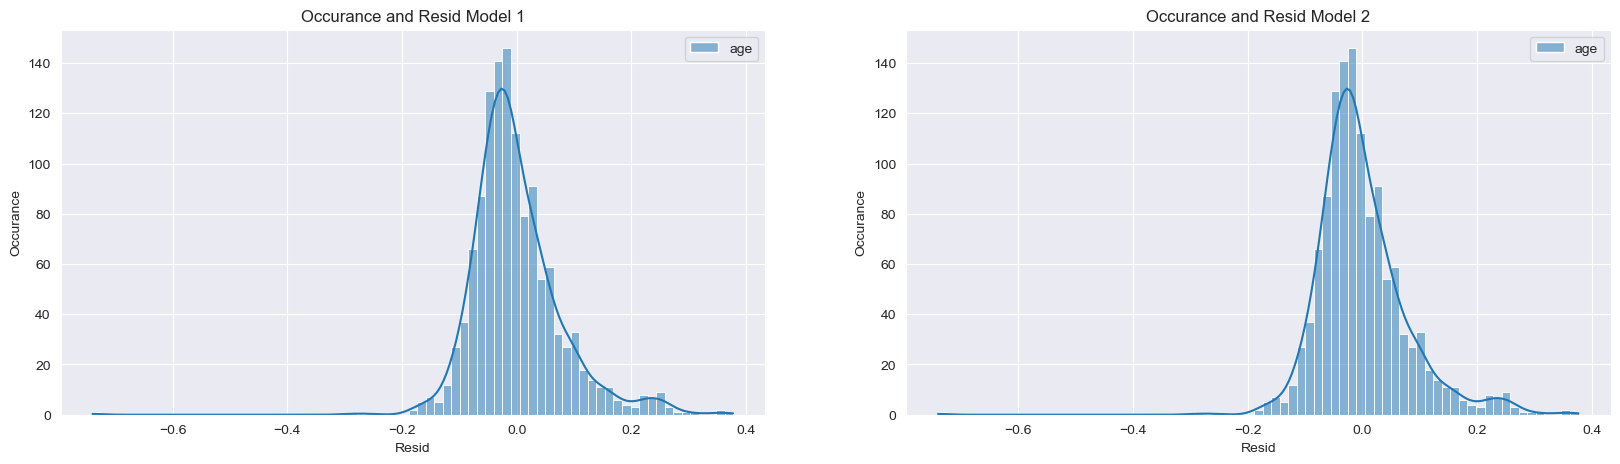

In [80]:
# Model two and one look roughly the same

plt.figure(figsize=[20, 5])

plt.subplot(1, 2, 1)
# Residual histogram 1
residuals_one = y_test - prediction_one
sns.histplot(residuals_one, kde=True)
plt.xlabel('Resid')
plt.ylabel('Occurance')
plt.title('Occurance and Resid Model 1')

plt.subplot(1, 2, 2)
# Residual histogram 2
residuals_two = y_test - prediction_one
sns.histplot(residuals_two, kde=True)
plt.xlabel('Resid')
plt.ylabel('Occurance')
plt.title('Occurance and Resid Model 2')

# Graph all plots
plt.show()

In [ ]:
print('And that\'s it! Model two performs better than model one as the evaluation metrics are better. There are many ways to improve this, but I will do that at another time.')